In [313]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [314]:
df=pd.read_csv('/Users/dongchen/Documents/MMAI/MBAN_6110/Assignment_1/sales_data.csv')
df.describe()

,Price,Units Sold
count,945.000000,943.000000
mean,108.628011,10.200424
std,167.350086,3.247589
min,0.190000,2.000000
25%,26.420000,8.000000
50%,64.640000,10.000000
75%,142.310000,12.000000
max,2636.900000,22.000000


In [315]:
#Find out number of the missing data in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


Step.1:  I chose to do is to drop all the NaN data in the 'Product' and 'Region' column, cause it the type of data that I could not predict and fill the missing by analyze the certain colunm .

In [316]:
#drop the missing data in Product and Region colunms 
df1 = df.dropna(subset=['Product','Region'])
#check if there are still missin data in those two colunms
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 1 to 1048
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     851 non-null    object 
 1   Region      851 non-null    object 
 2   Price       766 non-null    float64
 3   Units Sold  762 non-null    float64
 4   Sale Date   851 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.9+ KB


Step.2 Try to find the best way to fill the NaN data at the price colunm

In [319]:
#First I try to use mean and median of the price to fill the NaN data in the price colunm but mean and median of the price data has a huge difference even  I get ride of the outlier
df1.groupby('Product')['Price'].agg(['mean','median'])

,mean,median
Product,,
Product_1,98.842941,72.550
Product_10,103.243125,94.755
Product_11,125.675455,85.430
Product_12,81.461538,82.690
Product_13,88.629412,54.910
Product_14,105.698889,55.650
Product_15,89.121053,39.720
Product_16,78.740833,46.760
Product_17,119.851765,120.080


In [320]:
#Group the data by Product and Region to see if the price changes related to region
df1.groupby(['Product','Region'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Library/Frameworks/Python.framework/Versions/3.10/lib/pytho

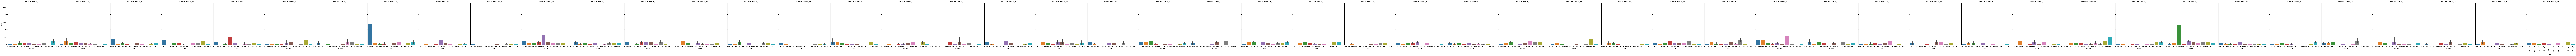

In [321]:
#Create data chart for each region and price for each product, comparing them. The charts demmonstrate the price of product is related to region
sns.catplot(x='Region',y='Price',data=df1,kind='bar',col='Product')
plt.xticks(rotation =90)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


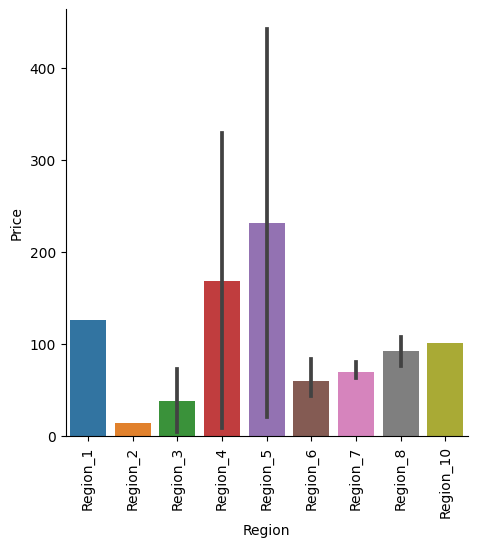

In [322]:
# The price difference of Product_1 in various region
r_order = ['Region_1','Region_2','Region_3','Region_4','Region_5','Region_6','Region_7','Region_8','Region_10']
pdf1=df[df['Product']=='Product_1']
sns.catplot(x='Region',y='Price',data=pdf1,kind='bar',order= r_order)
plt.xticks(rotation =90)
plt.show()

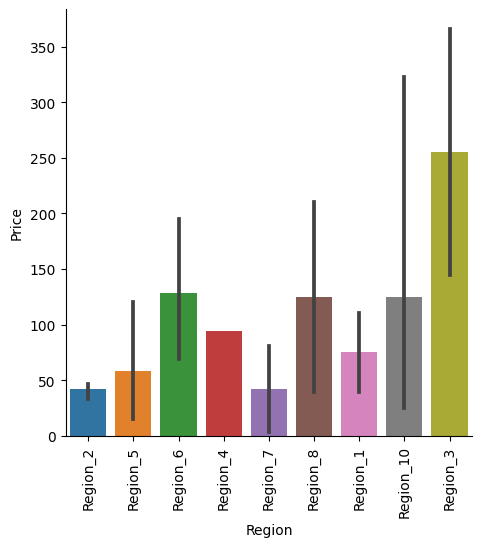

In [323]:
# The price difference of Product_40 in various region
pdf40=df[df['Product']=='Product_40']
sns.catplot(x='Region',y='Price',data=pdf40,kind='bar')
plt.xticks(rotation =90)
plt.show()

In [324]:
#Thus it is more accurate if we use the mean/median price of the group data 
test =df1.groupby(['Product','Region'])['Price'].mean()
test.reset_index('Region')

,Region,Price
Product,,
Product_1,Region_1,125.890000
Product_1,Region_10,100.230000
Product_1,Region_2,13.380000
Product_1,Region_3,37.975000
Product_1,Region_4,168.340000
...,...,...
Product_9,Region_5,75.323333
Product_9,Region_6,110.810000
Product_9,Region_7,NaN


Step.3: I will use the mean price of each product  in each region to fill the missing price. Then combine it with the quantity of sold product to give advise 

In [325]:

df2=df1.groupby(['Product','Region'])['Price'].agg(['mean','median'])
df2

mean   median
Product   Region                        
Product_1 Region_1   125.890000  125.890
          Region_10  100.230000  100.230
          Region_2    13.380000   13.380
          Region_3    37.975000   37.975
          Region_4   168.340000  168.340
...                         ...      ...
Product_9 Region_5    75.323333  100.320
          Region_6   110.810000  110.810
          Region_7          NaN      NaN
          Region_8   191.723333  282.730
          Region_9    76.010000   76.010

[403 rows x 2 columns]

In [326]:
#df1['product_region'] = df1['Product'].astype(str)+df1["Region"].astype(str)

In [327]:
#df1['Price'] = df1['Price'].fillna(df1.groupby('product_region')['Price'].transform('mean'))

In [328]:
#df1.groupby('product_region')['Price'].mean()

In [329]:
mean_unite = df1.groupby(['Product','Region'])['Units Sold'].mean()
mean_unite

Product    Region   
Product_1  Region_1     13.0
           Region_10    11.0
           Region_2      6.0
           Region_3     13.0
           Region_4     11.0
                        ... 
Product_9  Region_5     10.0
           Region_6     10.0
           Region_7      5.0
           Region_8     11.0
           Region_9     11.0
Name: Units Sold, Length: 403, dtype: float64

In [330]:
price_mean = df1.groupby(['Product'])['Price'].mean().to_frame()
type(price_mean)

pandas.core.frame.DataFrame

In [331]:
#Use products' mean price to fill the missing value in price colunm
for index, rows in price_mean.iterrows(): 
    df1.loc[df1['Product']==index,'Price'] = df1.loc[df1['Product']==index,'Price'].fillna(price_mean.loc[index,'Price'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 1 to 1048
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     851 non-null    object 
 1   Region      851 non-null    object 
 2   Price       851 non-null    float64
 3   Units Sold  762 non-null    float64
 4   Sale Date   851 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.9+ KB


In [332]:
avg_units = df1.groupby('Product')['Units Sold'].mean().to_frame()
avg_units

,Units Sold
Product,
Product_1,10.500000
Product_10,11.166667
Product_11,11.636364
Product_12,10.750000
Product_13,10.733333
Product_14,11.166667
Product_15,10.833333
Product_16,10.615385
Product_17,10.133333


In [341]:
for index,rows in avg_units.iterrows():
     df1.loc[df1['Product']==index,'Units Sold']=df1.loc[df1['Product']==index,'Units Sold'].fillna(avg_units.loc[index,'Units Sold'])

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 1 to 1048
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     851 non-null    object 
 1   Region      851 non-null    object 
 2   Price       851 non-null    float64
 3   Units Sold  851 non-null    float64
 4   Sale Date   851 non-null    object 
 5   Revenue     762 non-null    float64
dtypes: float64(3), object(3)
memory usage: 46.5+ KB


In [342]:
df1['Revenue'] = df1['Price']*df1['Units Sold']
df1

/var/folders/6m/hf0hqkzn3tv28lnjyh7tf5qm0000gn/T/ipykernel_14882/2603443275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Revenue'] = df1['Price']*df1['Units Sold']


,Product,Region,Price,Units Sold,Sale Date,Revenue
1,Product_40,Region_2,46.190000,10.0,2022-01-02,461.900000
2,Product_1,Region_5,98.842941,4.0,2022-01-03,395.371765
3,Product_6,Region_8,143.470000,8.0,2022-01-04,1147.760000
4,Product_44,Region_4,122.540000,10.0,2022-01-05,1225.400000
5,Product_21,Region_8,15.760000,20.0,2022-01-06,315.200000
...,...,...,...,...,...,...
1044,Product_39,Region_6,239.070000,10.0,2023-05-18,2390.700000
1045,Product_42,Region_3,18.630000,9.0,2023-07-10,167.670000
1046,Product_4,Region_3,159.270000,10.0,2024-07-14,1592.700000
1047,Product_43,Region_1,2.910000,13.0,2023-08-17,37.830000


First, I create a plot that reflect the sum of revenue in different region, in the chart we could notice that region 2 has the highest revenue, as a company I would like to know what kind of product are popular in that region

/var/folders/6m/hf0hqkzn3tv28lnjyh7tf5qm0000gn/T/ipykernel_14882/2195686231.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  a1=sns.catplot(x='Region', y='Revenue', data =df1, kind ='bar',order =r_order, palette='Blues',ci =False, height=5,aspect=2)


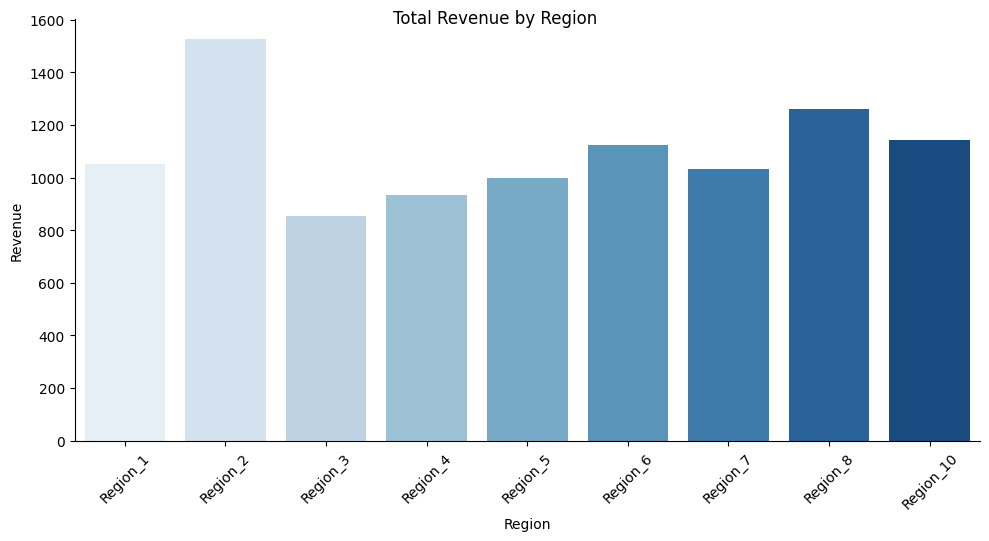

In [343]:
r_order = ['Region_1','Region_2','Region_3','Region_4','Region_5','Region_6','Region_7','Region_8','Region_10']
a1=sns.catplot(x='Region', y='Revenue', data =df1, kind ='bar',order =r_order, palette='Blues',ci =False, height=5,aspect=2)
a1.fig.suptitle('Total Revenue by Region')
plt.xticks(rotation =45)
plt.show()

/var/folders/6m/hf0hqkzn3tv28lnjyh7tf5qm0000gn/T/ipykernel_14882/177988722.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  a2=sns.catplot(x='Product', y='Revenue', data = r3_data, kind='bar',height=10,aspect=2, ci=False)


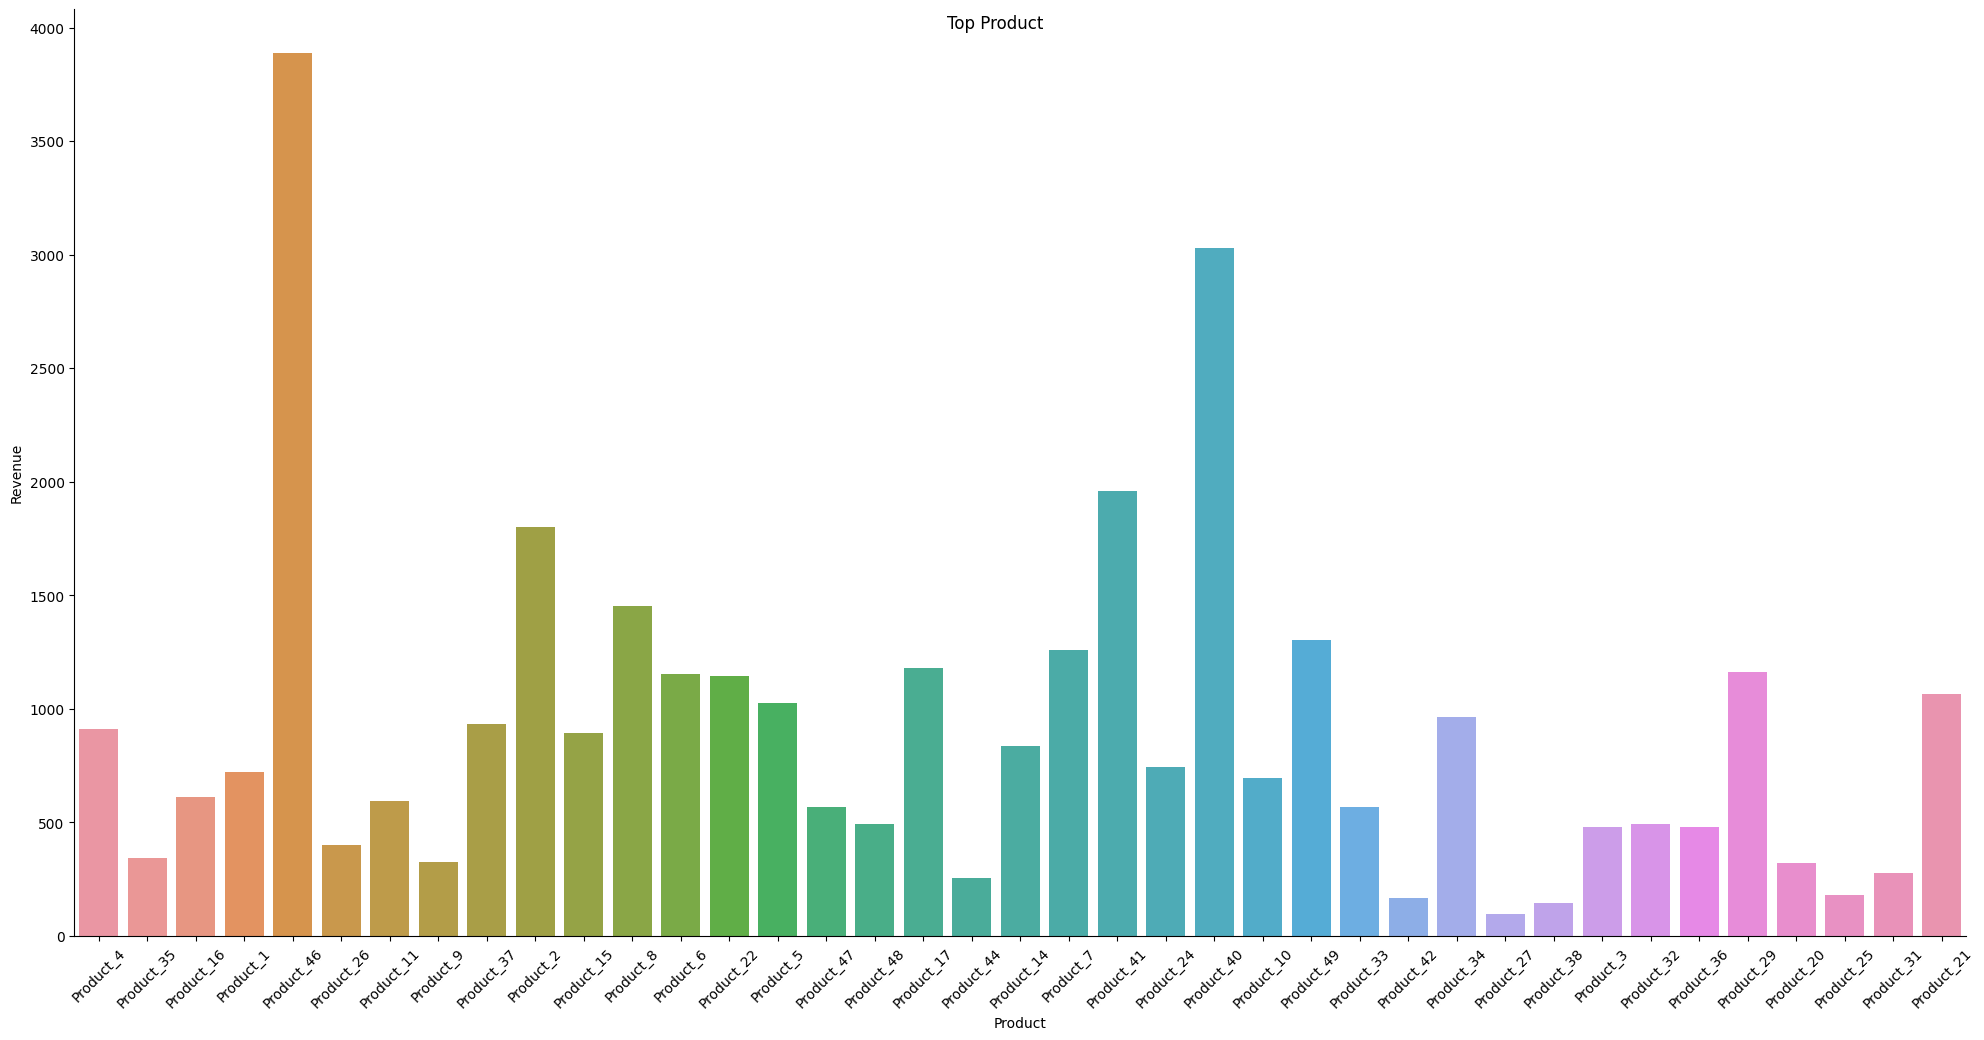

In [344]:
r3_data= df1[df1['Region']=='Region_3']
a2=sns.catplot(x='Product', y='Revenue', data = r3_data, kind='bar',height=10,aspect=2, ci=False)
a2.fig.suptitle('Top Product')
plt.xticks(rotation= 45)
plt.show()

In [345]:

r3_data.sort_values(by='Revenue',ascending= False)

,Product,Region,Price,Units Sold,Sale Date,Revenue
423,Product_40,Region_3,365.73,13.000000,2023-02-28,4754.490000
116,Product_46,Region_3,485.84,8.000000,2022-04-27,3886.720000
370,Product_41,Region_3,204.58,14.000000,2023-01-06,2864.120000
293,Product_37,Region_3,344.45,8.000000,2022-10-21,2755.600000
166,Product_2,Region_3,211.85,12.000000,2022-06-16,2542.200000
...,...,...,...,...,...,...
546,Product_48,Region_3,6.22,10.000000,2023-07-01,62.200000
418,Product_9,Region_3,5.86,9.882353,2023-02-23,57.910588
906,Product_9,Region_3,7.98,7.000000,2024-06-25,55.860000
550,Product_1,Region_3,3.40,10.500000,2023-07-05,35.700000


Use bar chart to find the top3 products have the most revenue

/var/folders/6m/hf0hqkzn3tv28lnjyh7tf5qm0000gn/T/ipykernel_14882/140769974.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.catplot(x='Product', y='Revenue', data= df1, height=10, aspect=2,ci=False, kind='bar')


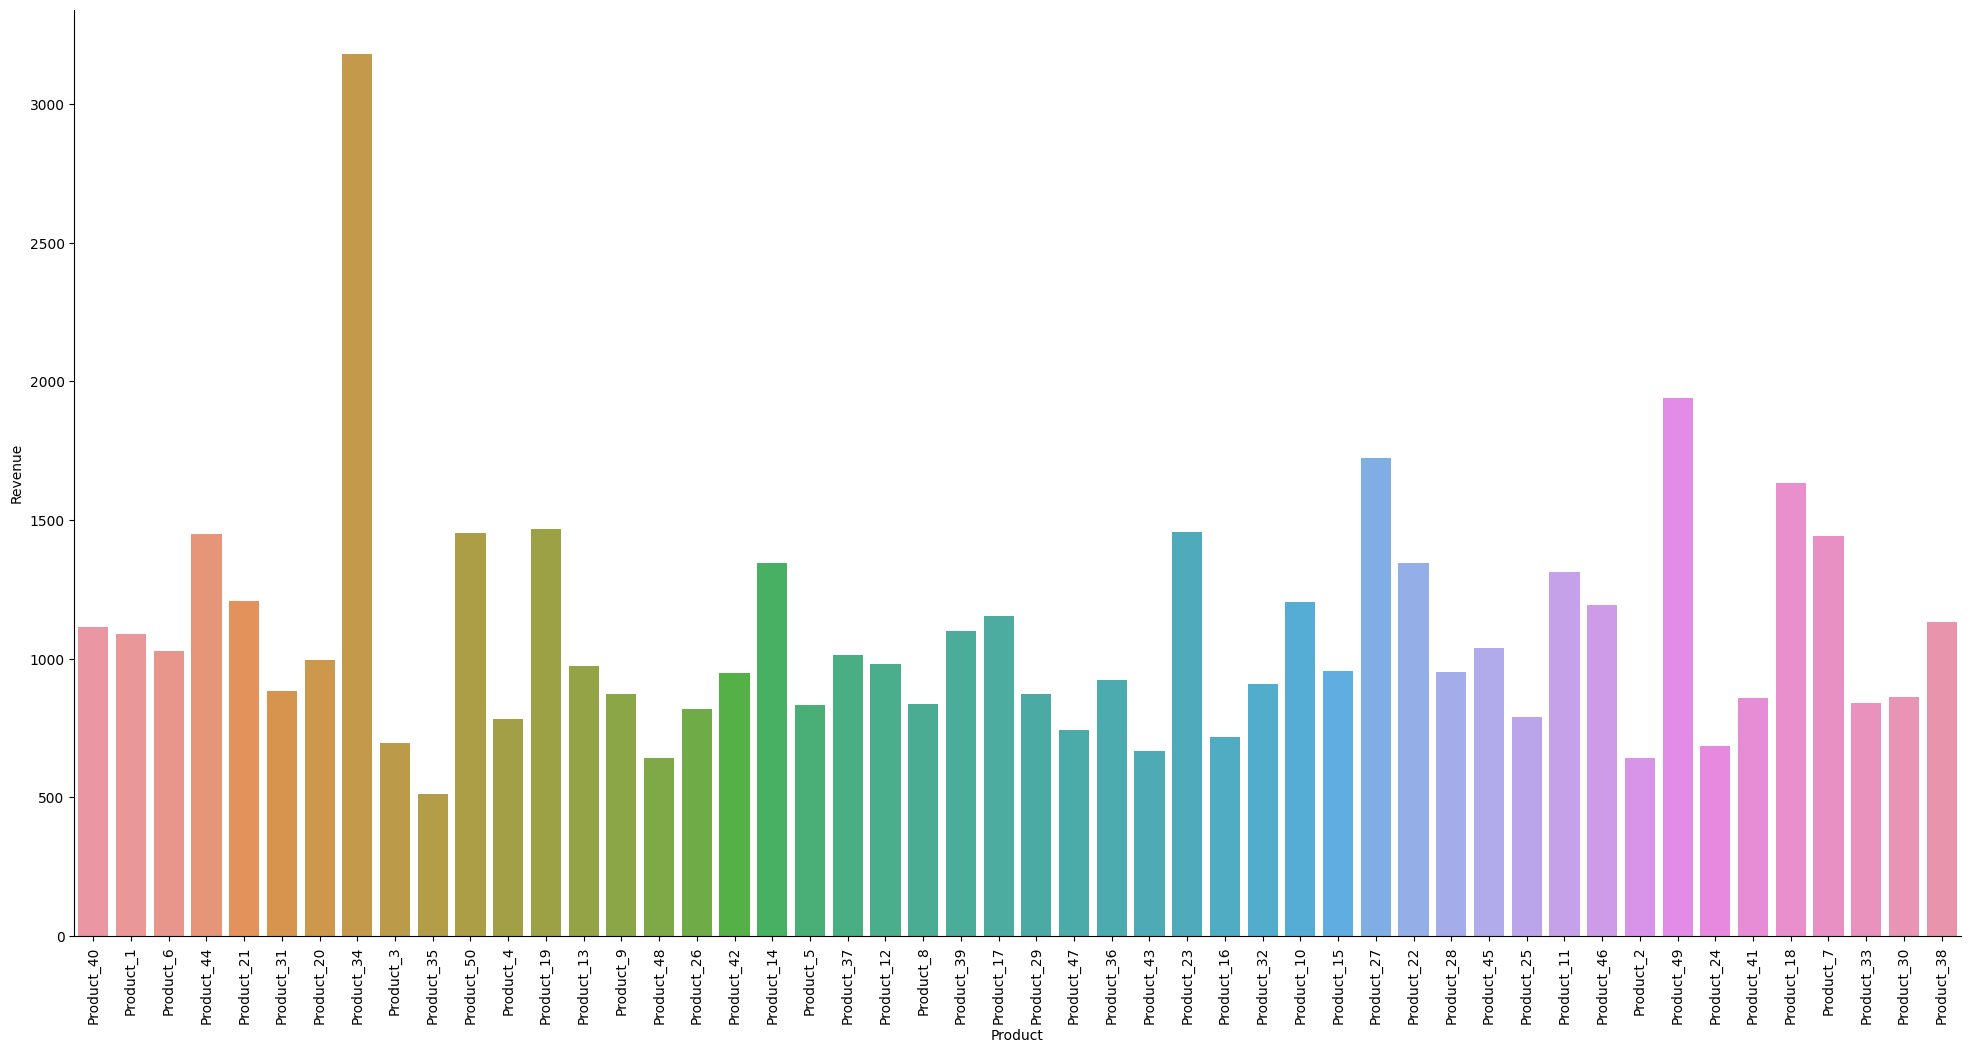

In [364]:
sns.catplot(x='Product', y='Revenue', data= df1, height=10, aspect=2,ci=False, kind='bar')
plt.xticks(rotation = 90)
plt.show()

In [376]:
#
top3=pd.concat([df1[df1['Product']=='Product_34'], df1[df1['Product']=='Product_27'], df1[df1['Product']=='Product_49']])
top3

,Product,Region,Price,Units Sold,Sale Date,Revenue,date
9,Product_34,Region_1,58.880,10.571429,2022-01-10,622.445714,2022-01-10
14,Product_34,Region_4,20.510,6.000000,2022-01-15,123.060000,2022-01-15
63,Product_34,Region_8,53.750,9.000000,2022-03-05,483.750000,2022-03-05
73,Product_34,Region_1,124.300,12.000000,2022-03-15,1491.600000,2022-03-15
103,Product_34,Region_7,142.770,14.000000,2022-04-14,1998.780000,2022-04-14
200,Product_34,Region_4,24.470,15.000000,2022-07-20,367.050000,2022-07-20
390,Product_34,Region_2,142.470,10.000000,2023-01-26,1424.700000,2023-01-26
421,Product_34,Region_2,2636.900,14.000000,2023-02-26,36916.600000,2023-02-26
517,Product_34,Region_5,28.810,7.000000,2023-06-02,201.670000,2023-06-02
573,Product_34,Region_3,273.540,6.000000,2023-07-28,1641.240000,2023-07-28


In the following chart I want to demostrate the units sold vs the dates, In this way we could analysis if the sales of the products are effect by season or trend. However we dont really have data that is large enough and I not sure how to use the interpolate to fill the data gap between each point.

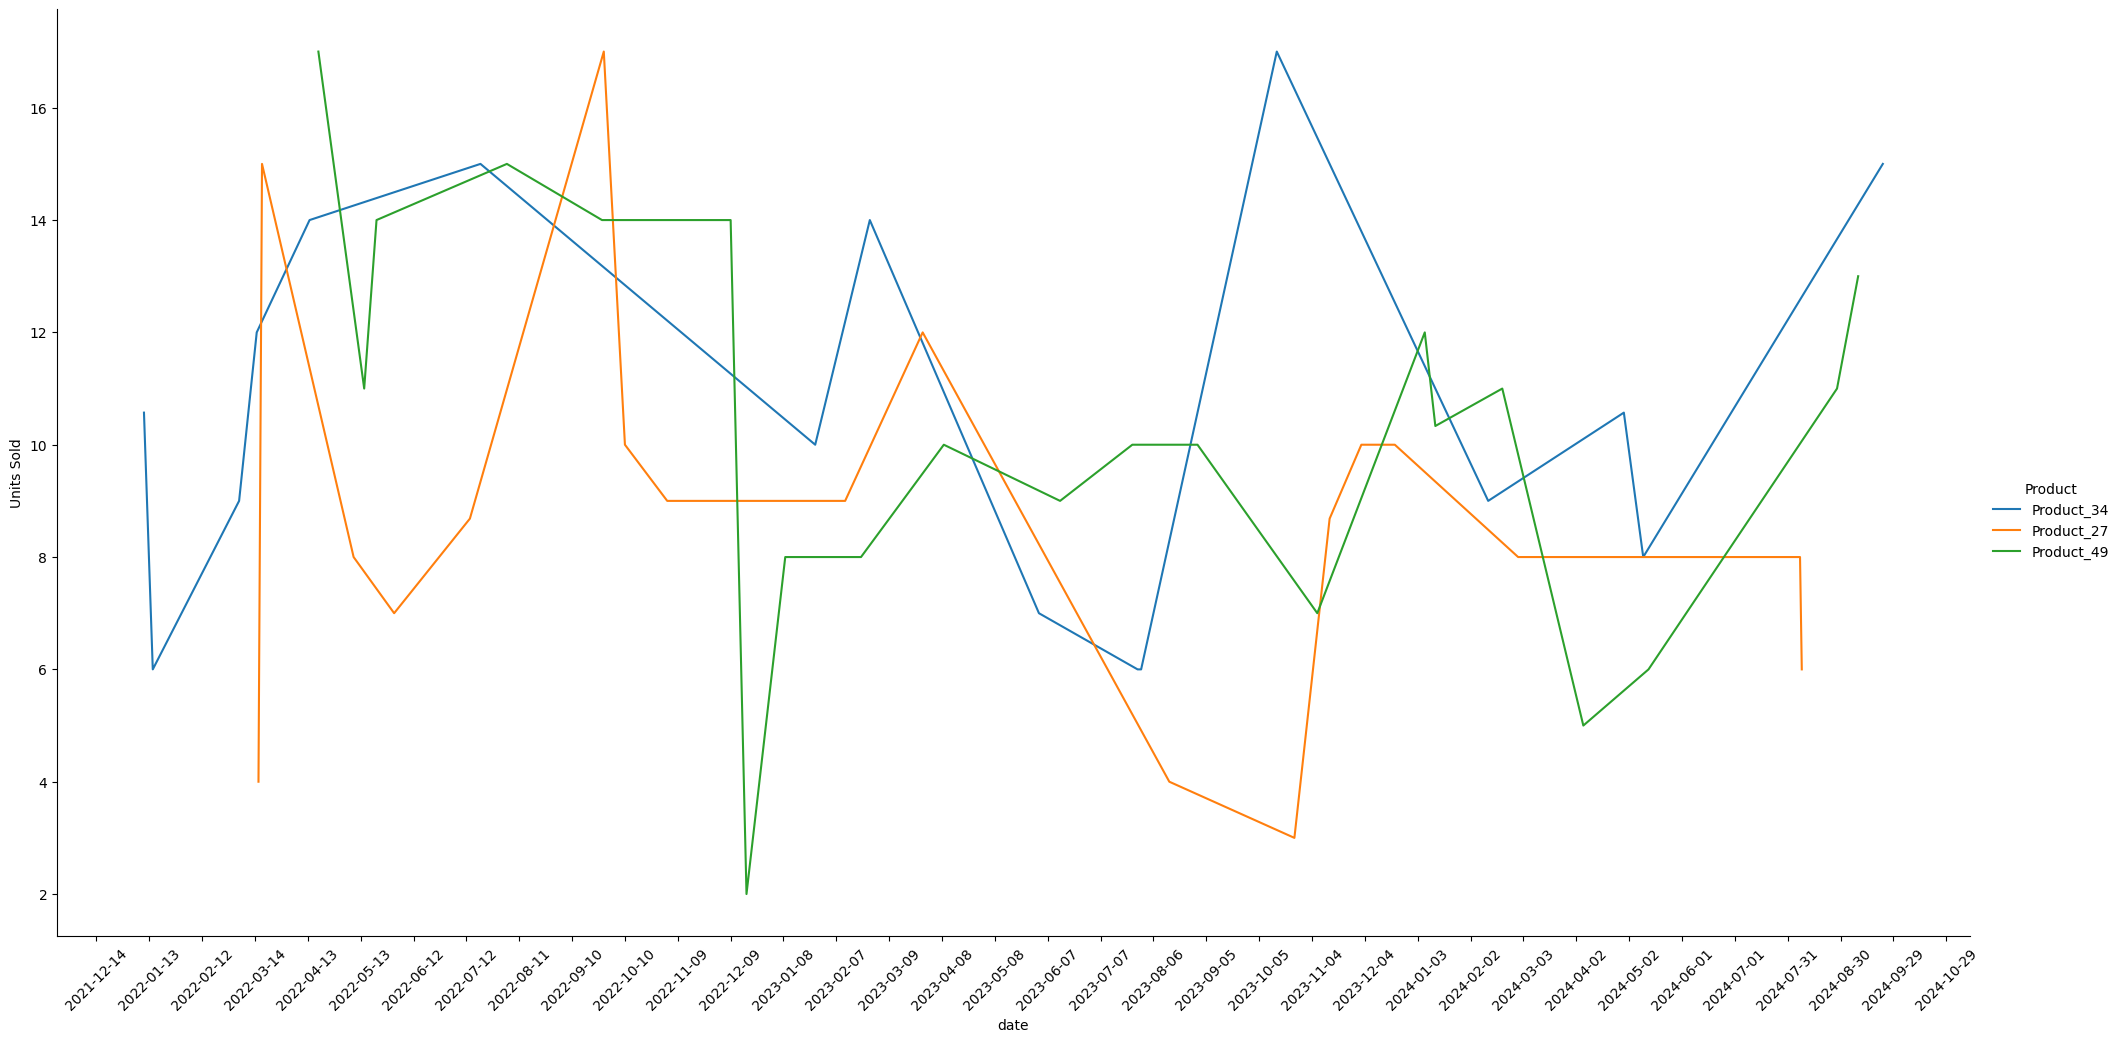

In [393]:
import datetime
import matplotlib.dates as mdates

# create date dataframe
dates_str =top3['Sale Date']
# turned string into date object/将日期字符串转换为日期对象
top3['date'] = [datetime.datetime.strptime(date_str, "%Y-%m-%d") for date_str in dates_str]
sns.relplot(x='date', y= 'Units Sold', data =top3, kind='line', hue='Product',aspect=2,height=10)
# Set the x interval to 30 days
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
# Set the x label format/设置 X 轴标签格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation = 45)
plt.show()